In [1]:
from Game import*

Version:  0.2.27


In [2]:
def initial_state():
    state=Board(4,5)
    
    for i in range(20):
        state [i]=1


    
    return state

In [3]:
initial_state()

 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 

In [4]:
state=initial_state()

In [5]:
def update_state(state,player,move):
    #a move is a start and end location
    new_state=state
    
    start_row,start_col=state.rc_from_index(move)
    
    for c in range(start_col,5):
        for r in range(start_row,4):
            new_state[r,c]=0
    
    return new_state

In [6]:
def show_state(state):
    print(state)

In [7]:
def valid_moves(state,player):
    moves=[]
    for location in range(20):
        if state[location]==1:
            moves.append(location)
    return moves


In [8]:
def win_status(state,player):
    if state[0]==0:
        return "lose"

In [9]:
# agents and human moves 

def random_move(state,player):
    moves=valid_moves(state,player)
    moves.remove(0)

    if not moves:
        return 0
    else:
        return random.choice(moves)
    
    
def human_move(state,player):
    
    state.show_locations()
    move=int(input("What square do you want to eat?"))
    
    
    return move
    


random_agent=Agent(random_move)
human_agent=Agent(human_move)

        

In [10]:
from Game.minimax import*
def minimax_move(state,player):
    values,moves=minimax_values(state,player,display=True)
    return top_choice(moves,values)

minimax_agent=Agent(minimax_move)

In [11]:
def skittles_move(state, player, info):
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    if state not in T:
        actions=valid_moves(state,player)
        T[state]=Table()
        for action in actions:
            T[state][action]=2 #initial number of skittles
    
    move=weighted_choice(T[state])
    
    if move is None:
        # learn
        if learning:
            if last_state:
                T[last_state][last_action]-=1 #take away a skittle
                if T[last_state][last_action]<0:
                    T[last_state][last_action]=0
        
        return random_move(state,player)
    else:
        return move

In [12]:
def skittles_after(status,player,info):
    #not return anything but
    #will adjust the skittles table if lost the game
    T=info.T
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    if status=='lose':
        T[last_state][last_action]-=1 #take away a skittle
        if T[last_state][last_action]<0:
            T[last_state][last_action]=0

In [13]:
skittles_agent=Agent(skittles_move)
skittles_agent.post=skittles_after
skittles_agent.T=Table()   #makes an empty table
skittles_agent.learning=True

In [14]:
def Q_move(state,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ
    
    if state not in Q:
        actions=valid_moves(state,player)
        Q[state]=Table()
        for action in actions:
            Q[state][action]=0  # initial value of table
    
    
    if random.random()<ϵ:  # take a random move occasionally to explore the environment
        move=random_move(state,player)
    else:
        move=top_choice(Q[state])
    
    if not last_action is None:  # not the first move
        reward=0
        
        # learn
        if learning:
            Q[last_state][last_action]+=α*(reward +
                        γ*max([Q[state][a] for a in Q[state]]) - Q[last_state][last_action])
    
    return move

In [15]:
def Q_after(status,player,info):
    Q=info.Q
    last_state=info.last_state
    last_action=info.last_action
    learning=info.learning
    
    α=info.α  # learning rate
    ϵ=info.ϵ  # how often to take a random move
    γ=info.γ  # memory constant -- how quickly does the table update back in time (earlier in the game)
    
    # \alpha <hit tab>    α
    # \epsilon <hit tab>  ϵ
    # \gamma <hit tab>    γ

    if status=='lose':
        reward=-1
    elif status=='win':
        reward=1
    elif status=='stalemate':
        reward=.5 # value stalemate a little closer to a win
    else:
        reward=0
    
    
    if learning:
        Q[last_state][last_action]+=α*(reward - Q[last_state][last_action])

In [16]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_after
Q1_agent.Q=Table()  # makes an empty table
Q1_agent.learning=True

Q1_agent.α=0.3  # learning rate
Q1_agent.ϵ=0.1  # how often to take a random move
Q1_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [17]:
Q2_agent=Agent(Q_move)
Q2_agent.post=Q_after
Q2_agent.Q=Table()  # makes an empty table
Q2_agent.learning=True

Q2_agent.α=0.3  # learning rate
Q2_agent.ϵ=0.1  # how often to take a random move
Q2_agent.γ=0.9  # memory constant -- how quickly does the table update back in time (earlier in the game)

In [18]:
state=initial_state()

In [22]:
g=Game()
g.run(minimax_agent,Q1_agent)

====
Game  1
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 

  Choice Time: 4 minutes 58.871227741241455 seconds 
Player 1 moves 12
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  0  0  0 
 1  1  0  0  0 

Player 2 moves 6
 1  1  1  1  1 
 1  0  0  0  0 
 1  0  0  0  0 
 1  0  0  0  0 

  Choice Time: 0.11520576477050781 seconds 
Player 1 moves 4
 1  1  1  1  0 
 1  0  0  0  0 
 1  0  0  0  0 
 1  0  0  0  0 

Player 2 moves 2
 1  1  0  0  0 
 1  0  0  0  0 
 1  0  0  0  0 
 1  0  0  0  0 

  Choice Time: 0.01018381118774414 seconds 
Player 1 moves 10
 1  1  0  0  0 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Player 2 moves 1
 1  0  0  0  0 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

  Choice Time: 0.0010004043579101562 seconds 
Player 1 moves 5
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Player 2 moves 0
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Player  1 won.


[1]

In [27]:
%%time
N_train=5
N_test=100

percentage_player1_wins=[]
percentage_player2_wins=[]
percentage_ties=[]
total_number_of_games=[]

Q1_agent.Q=Table()  # makes an empty table
Q2_agent.Q=Table()

current_game_number=0

for i in range(5000):
    
    Q1_agent.learning=Q2_agent.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    g.run(Q1_agent,Q2_agent)

    current_game_number+=N_train
    
    
    Q1_agent.learning=Q2_agent.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    results=g.run(Q1_agent,Q2_agent)
    
    percentage_player1_wins.append(results.count(1))
    percentage_player2_wins.append(results.count(2))
    percentage_ties.append(results.count(0)) 
    total_number_of_games.append(current_game_number)

Wall time: 5h 59min 19s


In [28]:
%matplotlib inline
from matplotlib.pylab import figure,plot,legend,xlabel,ylabel

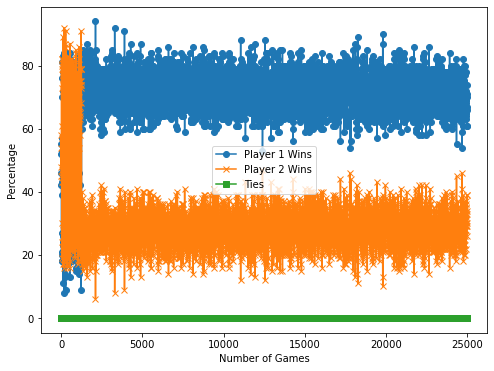

In [29]:
figure(figsize=(8,6))
plot(total_number_of_games,percentage_player1_wins,'-o',label="Player 1 Wins")
plot(total_number_of_games,percentage_player2_wins,'-x',label="Player 2 Wins")
plot(total_number_of_games,percentage_ties,'-s',label="Ties")
xlabel('Number of Games')
ylabel('Percentage')
legend()

In [61]:
SaveTable(Q1_agent.Q, "c:/Users/student/Desktop/Q1_agent.json")
SaveTable(Q2_agent.Q, "c:/Users/student/Desktop/Q2_agent.json")

In [63]:
LoadTable("c:/Users/student/Desktop/Q1_agent.json")
LoadTable("c:/Users/student/Desktop/Q2_agent.json")

{(1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0): {0: -0.9999999999999999},
 (1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): {0: -0.3,
  5: 0.9999999999999999},
 (1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0,
  5: 0.9999999999794995,
  10: -0.4481045260629521},
 (1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0): {0: 0,
  5: 0.9999999992742544,
  10: -0.7941138126316957,
  15: -0.591295740064685},
 (1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): {0: -0.3,
  1: 0.9999999999999999},
 (1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0): {0: -0.9176457,
  1: -0.8999999999999998,
  5: -0.8999999999999998},
 (1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0): {0: 0,
  1: -0.6839099999999999,
  5: -0.676283168277,
  10: 0.8999999999999998},
 (1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0): {0: 0,
  1: -0.4720388999039838,
  5: 0,
  10: 0.89993520575924

In [65]:
%%time
g=Game()
g.run(Q1_agent,minimax_agent)

====
Game  1
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 

Player 1 moves 12
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  0  0  0 
 1  1  0  0  0 

  Choice Time: 13.110159158706665 seconds 
Player 2 moves 10
 1  1  1  1  1 
 1  1  1  1  1 
 0  0  0  0  0 
 0  0  0  0  0 

Player 1 moves 9
 1  1  1  1  1 
 1  1  1  1  0 
 0  0  0  0  0 
 0  0  0  0  0 

  Choice Time: 0.2391800880432129 seconds 
Player 2 moves 7
 1  1  1  1  1 
 1  1  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Player 1 moves 3
 1  1  1  0  0 
 1  1  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

  Choice Time: 0.009787797927856445 seconds 
Player 2 moves 6
 1  1  1  0  0 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Player 1 moves 2
 1  1  0  0  0 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

  Choice Time: 0.0 seconds 
Player 2 moves 1
 1  0  0  0  0 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

Player 1 moves 5
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 

  Choice Time: 0.000998

[1]

In [79]:
g=Game()
g.run(human_agent,Q1_agent)

====
Game  1
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 
 1  1  1  1  1 

 0  1  2  3  4 
 5  6  7  8  9 
10 11 12 13 14 
15 16 17 18 19 



KeyboardInterrupt: Interrupted by user